LIBRAIRIE

In [11]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
import datetime as dt 

Environnement: Tickers, date de début et de fin, dataframe 

In [12]:
startDate = dt.date(2013,1,1)
endDate = dt.date(2024,8,1)

Asset = ["AAPL","META","MSFT","AMZN","TSLA","GOOGL","MCD"]

prix = yf.download(Asset,start=startDate,end=endDate)["Adj Close"]

[*********************100%%**********************]  7 of 7 completed


In [13]:
prix

Ticker,AAPL,AMZN,GOOGL,MCD,META,MSFT,TSLA
Date,,,,,,,
2013-01-02,16.705708,12.865500,18.078600,66.192001,27.942581,22.451811,2.357333
2013-01-03,16.494839,12.924000,18.089098,66.566566,27.713053,22.151052,2.318000
2013-01-04,16.035383,12.957500,18.446547,65.993675,28.701021,21.736481,2.293333
2013-01-07,15.941054,13.423000,18.366058,66.772232,29.359669,21.695829,2.289333
2013-01-08,15.983956,13.319000,18.329815,66.794281,29.000406,21.582027,2.245333
...,...,...,...,...,...,...,...
2024-07-25,217.238556,179.850006,167.279999,251.460007,453.410004,417.647217,220.250000
2024-07-26,217.708008,182.500000,167.000000,252.000000,465.700012,424.504852,219.800003
2024-07-29,217.987686,183.199997,169.529999,261.420013,465.709991,425.962250,232.100006


Calcul des rendements

In [14]:
rendement = np.log(1 + prix.pct_change())
rendement.dropna(inplace=True)
rendement

Ticker,AAPL,AMZN,GOOGL,MCD,META,MSFT,TSLA
Date,,,,,,,
2013-01-03,-0.012703,0.004537,0.000581,0.005643,-0.008248,-0.013486,-0.016826
2013-01-04,-0.028250,0.002589,0.019568,-0.008644,0.035029,-0.018893,-0.010699
2013-01-07,-0.005900,0.035295,-0.004373,0.011728,0.022689,-0.001872,-0.001746
2013-01-08,0.002688,-0.007778,-0.001975,0.000330,-0.012312,-0.005259,-0.019407
2013-01-09,-0.015752,-0.000113,0.006551,-0.001431,0.051311,0.005634,-0.001188
...,...,...,...,...,...,...,...
2024-07-25,-0.004816,-0.005434,-0.031482,-0.007567,-0.017187,-0.024786,0.019531
2024-07-26,0.002159,0.014627,-0.001675,0.002145,0.026745,0.016286,-0.002045
2024-07-29,0.001284,0.003828,0.015036,0.036699,0.000021,0.003427,0.054450


In [15]:
#Generer des poids aleatoires 
np.random.seed(10)

weight = np.random.random(len(rendement.columns))
weight /= np.sum(weight)

In [16]:
def Esp(weight,rendement):
    rdt_moyen = np.sum(np.dot(weight,rendement.mean()))
    return rdt_moyen

In [17]:
rendement.std()

Ticker
AAPL     0.017786
AMZN     0.020308
GOOGL    0.017231
MCD      0.012179
META     0.024288
MSFT     0.016727
TSLA     0.035722
dtype: float64

In [18]:
def ecart_type(weight,rendement):
    standard_deviation  = np.sum(np.dot(np.dot(weight,rendement.cov()),weight.T))
    return standard_deviation

In [19]:
X = []
sigma = []

for i in range(100000):
    w = np.random.random(len(rendement.columns))
    w /= np.sum(w)

    X.append(Esp(w,rendement))
    sigma.append(ecart_type(w,rendement))
    

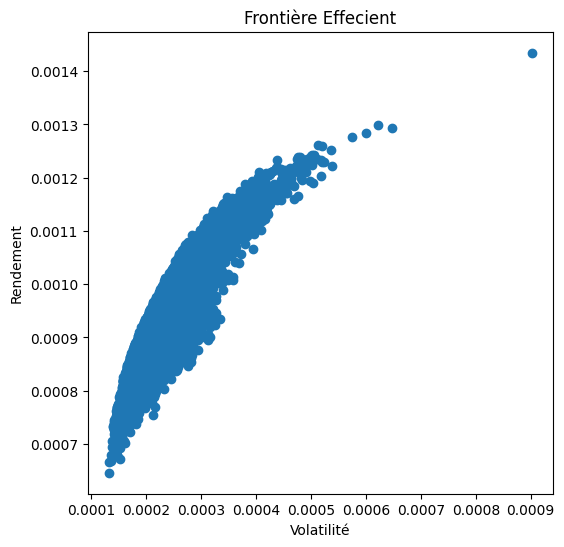

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(sigma, X)
plt.xlabel('Volatilité')
plt.ylabel('Rendement')
plt.title('Frontière Effecient')
plt.show()